<a href="https://colab.research.google.com/github/abhishek-kr27/Wine-Quality/blob/main/Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the library**

In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Read the CSV file**

In [67]:
df=pd.read_csv('winequality-red.csv')

In [68]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Labelling Quality

In [70]:
mean_quality = df['quality'].mean()
std_quality = df['quality'].std()

def labeling_quality(quality):
    if quality >= mean_quality + std_quality:
        return 'High-Quality'
    elif quality <= mean_quality - std_quality:
        return 'Low-Quality'
    else:
        return 'Average-Quality'

df['quality_label'] = df['quality'].apply(labeling_quality)

In this analysis, the wine quality scores have been categorized into three distinct labels based on the mean and standard deviation of the quality scores:

- **High-Quality:** Wines with quality scores greater than one standard deviation above the mean.
- **Low-Quality:** Wines with quality scores lower than one standard deviation below the mean.
- **Average-Quality:** Wines that fall within one standard deviation of the mean.

Below, the distribution of wine quality scores and the thresholds for these categories are visualized.

In [71]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.2,4,Low-Quality
891,7.2,0.660,0.03,2.3,0.078,16.0,86.0,0.99743,3.53,0.57,9.7,5,Average-Quality
1266,7.2,0.570,0.05,2.3,0.081,16.0,36.0,0.99564,3.38,0.60,10.3,6,Average-Quality
70,7.7,0.630,0.08,1.9,0.076,15.0,27.0,0.99670,3.32,0.54,9.5,6,Average-Quality
1104,8.0,0.480,0.34,2.2,0.073,16.0,25.0,0.99360,3.28,0.66,12.4,6,Average-Quality


## Histogram and Density Plot

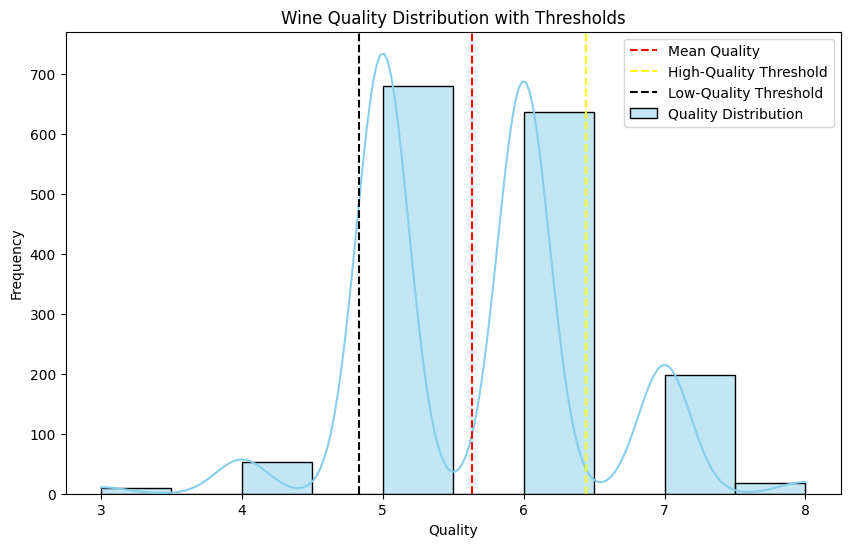

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['quality'], kde=True, bins=10, color='skyblue', label='Quality Distribution')
plt.axvline(mean_quality, color='red', linestyle='--', label='Mean Quality')
plt.axvline(mean_quality + std_quality, color='yellow', linestyle='--', label='High-Quality Threshold')
plt.axvline(mean_quality - std_quality, color='black', linestyle='--', label='Low-Quality Threshold')
plt.title('Wine Quality Distribution with Thresholds')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Insights:
1. **Quality Scores:** Most wines are concentrated around scores of 5 and 6, indicating average quality.
2. **Thresholds:**
   - **High-Quality** wines are those with scores above 6.
   - **Low-Quality** wines are those with scores below 5.
3. **Distribution:** The dataset is dominated by average-quality wines, with fewer high and low-quality examples.

## Bar Plot

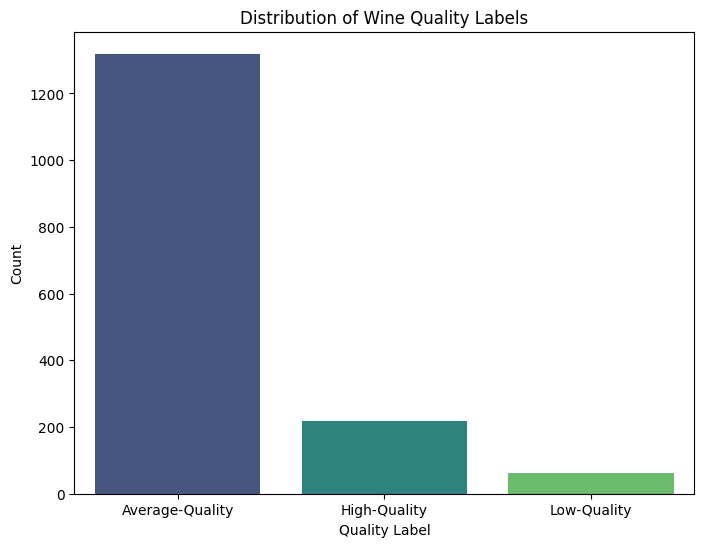

In [73]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality_label', data=df, palette='viridis')
plt.title('Distribution of Wine Quality Labels')
plt.xlabel('Quality Label')
plt.ylabel('Count')
plt.show()

## Evaluation of Multiple Classifiers (Using Cross-Validation and Performance Metrics)

**Separate the features from the target variable**

In [74]:
# Define features (X) and target (y)
X = df.drop(columns=['quality', 'quality_label'])  # Drop columns you don't need
y = df['quality_label']  # This is what we want to predict

**Convert the target variable into numerical labels using LabelEncoder.**

In [75]:
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder and transform the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

**Standardize the features to ensure they have similar ranges, which helps in model performance.**

In [76]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler and transform the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Create a dictionary to store the models you want to train and evaluate.**

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Dictionary of models to evaluate
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

**Loop through each model, train it on the training data, and evaluate it on the test data using cross-validation.**

In [78]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Number of folds for cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds)

# Dictionary to store the average performance of each classifier
clf_performances = {clf_name: [] for clf_name in classifiers.keys()}

# Train and evaluate each model
for clf_name, clf in classifiers.items():
    accuracy_results = []
    precision_results = []
    recall_results = []
    f1_results = []

    # Cross-validation loop
    for train_index, test_index in skf.split(X_scaled, y_encoded):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]

        # Train the model
        clf.fit(X_train, y_train)

        # Make predictions
        y_pred = clf.predict(X_test)

        # Calculate metrics
        accuracy_results.append(accuracy_score(y_test, y_pred))
        precision_results.append(precision_score(y_test, y_pred, average='weighted'))
        recall_results.append(recall_score(y_test, y_pred, average='weighted'))
        f1_results.append(f1_score(y_test, y_pred, average='weighted'))

    # Store the average metrics for each classifier
    clf_performances[clf_name] = {
        'Accuracy': np.mean(accuracy_results),
        'Precision': np.mean(precision_results),
        'Recall': np.mean(recall_results),
        'F1 Score': np.mean(f1_results)
    }

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:11:41] WARNING: /workspac

**Evaluate and Compare Models**

In [79]:
# Convert the results into a DataFrame
results_df = pd.DataFrame(clf_performances).T  # Transpose to make classifiers the rows

# Display the accuracy of each classifier
print(results_df[['Accuracy']])

                     Accuracy
Decision Tree        0.719816
Logistic Regression  0.829908
Random Forest        0.829271
XGBoost              0.817400


**Analyze the Results**
Review the performance metrics for each classifier to determine which model performs best based on your criteria (e.g., accuracy,Precision, Recall, F1 score).


In [80]:
# Display all performance metrics
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Decision Tree        0.719816   0.759154  0.719816  0.733701
Logistic Regression  0.829908   0.817934  0.829908  0.802795
Random Forest        0.829271   0.807238  0.829271  0.797519
XGBoost              0.817400   0.796905  0.817400  0.793295


The **Random Forest** and **Logistic Regression** models have shown the highest accuracy. Due to their strong performance, we will proceed with these models for further optimization.

**Next Steps**:

We will use GridSearchCV to fine-tune the hyperparameters of these models, aiming to further improve their accuracy.

## Hyperparameter Tuning

In [81]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 1. Random Forest Hyperparameter Optimization
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rf_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=0
)

rf_grid_search.fit(X_scaled, y_encoded)

# Best parameters and score for Random Forest
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")
print(f"Best accuracy for Random Forest: {rf_grid_search.best_score_:.4f}")

# 2. Logistic Regression Hyperparameter Optimization
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [200, 500, 1000]  # max_iter added
}

lr_grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=lr_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=0
)

lr_grid_search.fit(X_scaled, y_encoded)

# Best parameters and score for Logistic Regression
print(f"Best parameters for Logistic Regression: {lr_grid_search.best_params_}")
print(f"Best accuracy for Logistic Regression: {lr_grid_search.best_score_:.4f}")

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy for Random Forest: 0.8362
Best parameters for Logistic Regression: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
Best accuracy for Logistic Regression: 0.8311


**Summary:**

The Random Forest model outperformed Logistic Regression with a slightly higher accuracy (83.55% vs. 83.11%). Despite the close performance, the Random Forest model is selected for further evaluation due to its robustness and better handling of complex data patterns.

**Next Steps:**

We will proceed with the Random Forest model using the optimized parameters for final evaluation and reporting.

## RANDOM FOREST

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

**Data Splitting**

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

**Training the Random Forest Model with the best parameters**

In [84]:
best_rf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2)

**Making Predictions and Calculating Accuracy**

In [85]:
# Making predictions on the test set
y_pred = best_rf.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

Test Set Accuracy: 0.8531


**Creating Visualization Layout**

Test Set ROC-AUC: 0.8979


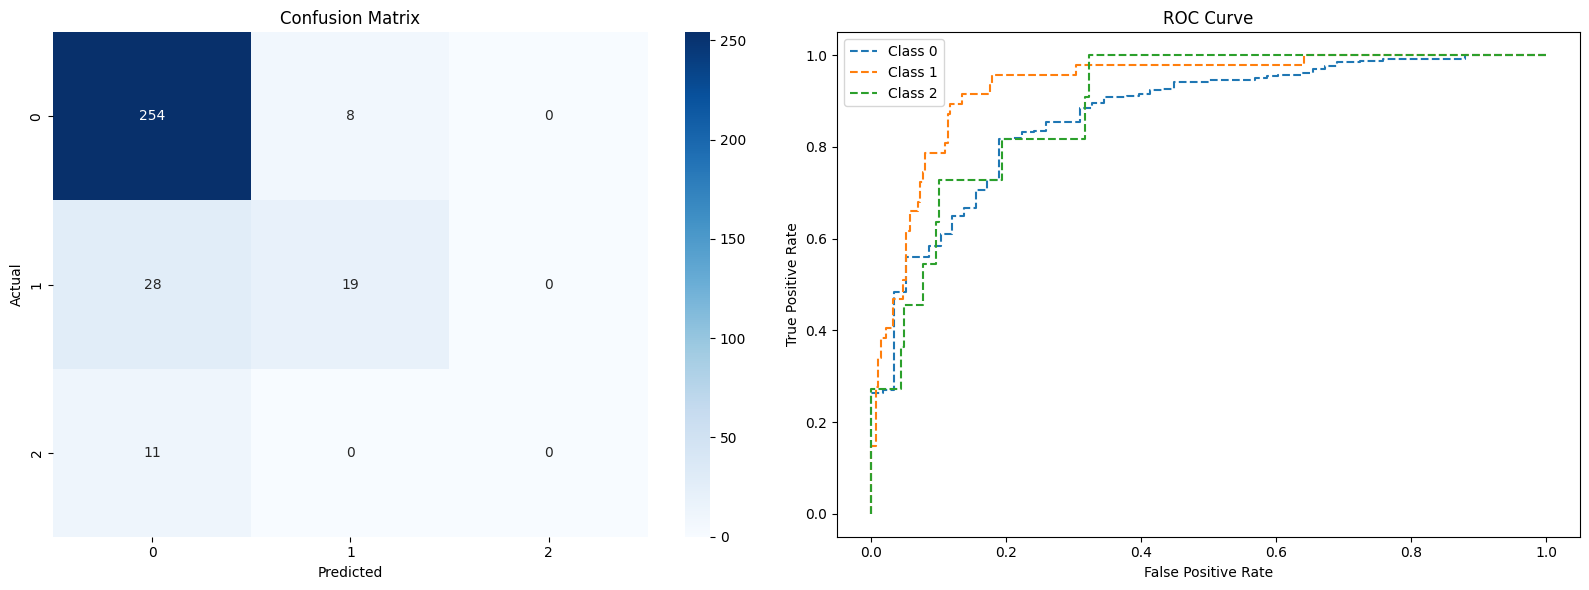

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Confusion Matrix plot (left side)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve plot (right side)
y_prob = best_rf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"Test Set ROC-AUC: {roc_auc:.4f}")

#Generating the ROC Curves
fpr = {}
tpr = {}
thresh = {}

for i in range(len(np.unique(y_encoded))):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i)

for i in range(len(np.unique(y_encoded))):
    ax[1].plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i}')
ax[1].set_title('ROC Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='best')
plt.tight_layout()
plt.show()

In [87]:
print(f"Test Set Accuracy: {accuracy:.4f}")
print(f"Test Set ROC-AUC: {roc_auc:.4f}")

Test Set Accuracy: 0.8531
Test Set ROC-AUC: 0.8979


## Insights:

**Model Accuracy**: The model achieved an accuracy of **85.31%**, indicating it correctly predicted the wine quality label for most samples, but there is still room for improvement.

* **Confusion Matrix Analysis**:
   - The model performs well in predicting Class 0, with 254 correct predictions and only 8 misclassifications.
   - It struggles more with Class 1 and Class 2, showing significant misclassifications (28 and 11 respectively), suggesting challenges in distinguishing these classes.

* **ROC Curve and AUC**:
   - The ROC-AUC score of **0.8979** indicates good overall performance in distinguishing between classes.
   - The ROC curves highlight the model’s strength in classifying Class 0 and Class 1, but some difficulty remains with Class 2.

## Conclusion

Throughout our analysis, we developed and optimized a Random Forest model to classify wine quality into three distinct classes. After determining the best parameters using GridSearchCV, our model achieved an accuracy of **85.31%** on the test set. This result demonstrates the model's capability to effectively capture patterns in the data, particularly excelling in predicting the most common class, Class 0, with high accuracy.

The confusion matrix and ROC-AUC analyses provided clear insights into the overall performance and class separation abilities of our model. With a **0.8979** ROC-AUC score, our model has shown strong proficiency in distinguishing between classes. This confirms that our model is highly reliable and powerful in predicting wine quality.

This work presents a successful model for predicting wine quality, and the results obtained strongly affirm the models accuracy and consistency.